In [1]:
# Data preparation
import pandas as pd
import numpy as np

# Load data
JLPT = pd.read_csv("JLPTFull.csv", encoding = "utf-8")
Top10K_Kagome = pd.read_csv("SRC/2021_Top10K_JP_Frequency_Kagome.csv", encoding = "shift_jis", delimiter = ";")
Top10K_Kagome.drop(columns=Top10K_Kagome.columns[0], axis=1, inplace=True)
Duolingo = pd.read_csv("Duolingo_unique_words.csv", encoding = "utf-8")

print(Top10K_Kagome)

C:\Users\mathi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


     Lemma  Occurrences
0        の    100210912
1        に     48486620
2        を     45359475
3        は     44889871
4        年     36248501
...    ...          ...
9995    不振        13753
9996    配線        13752
9997  意味合い        13752
9998    必然        13750
9999   カッコ        13749

[10000 rows x 2 columns]


In [2]:
print(JLPT)

     Column1 JLPT_Level
0         毎月         N5
1         太い         N5
2         五日         N5
3         出る         N5
4          話         N5
...      ...        ...
7394      作り         N1
7395      調理         N1
7396     聴診器         N1
7397     誂える         N1
7398     即する         N1

[7399 rows x 2 columns]


In [3]:
# Load the provided files
import pandas as pd

# Load the files as DataFrames
duolingo_words = pd.read_csv('Duolingo_unique_words.csv', encoding="utf-8", header=None, names=["Word"])
jlpt_full = pd.read_csv('JLPTFull.csv', encoding="utf-8")
top10k = pd.read_csv('SRC/2021_Top10K_JP_Frequency_Kagome.csv', encoding="shift_jis", delimiter = ";")

# Display the first few rows of each DataFrame to understand their structures
duolingo_words.head(), jlpt_full.head(), top10k.head()

# Rename columns for consistency
jlpt_full.rename(columns={"Column1": "Word"}, inplace=True)
top10k.rename(columns={"Rank": "Rank", "Lemma": "Word", "Occurrences": "Occurrences"}, inplace=True)

duolingo_words.head(), jlpt_full.head(), top10k.head()


(   Word
 0  Word
 1    札幌
 2   大晦日
 3    福袋
 4    紅葉,
   Word JLPT_Level
 0   毎月         N5
 1   太い         N5
 2   五日         N5
 3   出る         N5
 4    話         N5,
    Rank Word  Occurrences
 0     1    の    100210912
 1     2    に     48486620
 2     3    を     45359475
 3     4    は     44889871
 4     5    年     36248501)

In [4]:
# Add columns for Duolingo and JLPT presence to the Top10K dataframe
top10k["Duolingo_Words"] = top10k["Word"].isin(duolingo_words["Word"]).astype(int)  # 1 if present in Duolingo
top10k["JLPT_Words"] = top10k["Word"].isin(jlpt_full["Word"]).astype(int)          # 1 if present in JLPT

# Identify words in Duolingo but not in Top10K
duolingo_extra = duolingo_words[~duolingo_words["Word"].isin(top10k["Word"])].copy()
duolingo_extra["Rank"] = None
duolingo_extra["Occurrences"] = None
duolingo_extra["Duolingo_Words"] = 1
duolingo_extra["JLPT_Words"] = 0

# Identify words in JLPT but not in Top10K or Duolingo
jlpt_extra = jlpt_full[~jlpt_full["Word"].isin(top10k["Word"]) & ~jlpt_full["Word"].isin(duolingo_words["Word"])].copy()
jlpt_extra["Rank"] = None
jlpt_extra["Occurrences"] = None
jlpt_extra["Duolingo_Words"] = 0
jlpt_extra["JLPT_Words"] = 1

# Combine the Top10K, Duolingo extra, and JLPT extra into a single dataframe
combined = pd.concat([top10k, duolingo_extra, jlpt_extra], ignore_index=True)

combined.to_csv("Output/Combined_Wordlist.csv", index=False, encoding="utf-8-sig")
combined.head(50)


,Rank,Word,Occurrences,Duolingo_Words,JLPT_Words,JLPT_Level
0,1,の,100210912,1,1,NaN
1,2,に,48486620,1,1,NaN
2,3,を,45359475,1,1,NaN
3,4,は,44889871,1,1,NaN
4,5,年,36248501,1,1,NaN
5,6,が,35947527,1,1,NaN
6,7,た,33512205,1,0,NaN
7,8,で,31990565,1,1,NaN
8,9,て,30603437,1,0,NaN
9,10,と,27106309,1,1,NaN


In [5]:
# NEW
# Add columns for Duolingo and JLPT presence to the Top10K dataframe
top10k["Duolingo_Words"] = top10k["Word"].isin(duolingo_words["Word"]).astype(int)  # 1 if present in Duolingo
top10k["JLPT_Words"] = top10k["Word"].isin(jlpt_full["Word"]).astype(int)          # 1 if present in JLPT

# Remove duplicates in jlpt_full and map JLPT_Level based on Word
jlpt_level_map = jlpt_full.drop_duplicates(subset="Word").set_index("Word")["JLPT_Level"]
top10k["JLPT_Level"] = top10k["Word"].map(jlpt_level_map)

# Identify words in Duolingo but not in Top10K
duolingo_extra = duolingo_words[~duolingo_words["Word"].isin(top10k["Word"])].copy()
duolingo_extra["Rank"] = None
duolingo_extra["Occurrences"] = None
duolingo_extra["Duolingo_Words"] = 1
duolingo_extra["JLPT_Words"] = 0
duolingo_extra["JLPT_Level"] = None  # No JLPT level for Duolingo extra words

# Identify words in JLPT but not in Top10K or Duolingo
jlpt_extra = jlpt_full[~jlpt_full["Word"].isin(top10k["Word"]) & ~jlpt_full["Word"].isin(duolingo_words["Word"])].copy()
jlpt_extra["Rank"] = None
jlpt_extra["Occurrences"] = None
jlpt_extra["Duolingo_Words"] = 0
jlpt_extra["JLPT_Words"] = 1
# JLPT_Level already exists in jlpt_extra, no need to modify it

# Combine the Top10K, Duolingo extra, and JLPT extra into a single dataframe
combined = pd.concat([top10k, duolingo_extra, jlpt_extra], ignore_index=True)

combined.to_csv("Output/Combined_Wordlist.csv", index=False, encoding="utf-8-sig")
combined.head(50)


,Rank,Word,Occurrences,Duolingo_Words,JLPT_Words,JLPT_Level
0,1,の,100210912,1,1,N5
1,2,に,48486620,1,1,N5
2,3,を,45359475,1,1,N5
3,4,は,44889871,1,1,N5
4,5,年,36248501,1,1,N5
5,6,が,35947527,1,1,N5
6,7,た,33512205,1,0,NaN
7,8,で,31990565,1,1,N5
8,9,て,30603437,1,0,NaN
9,10,と,27106309,1,1,N5


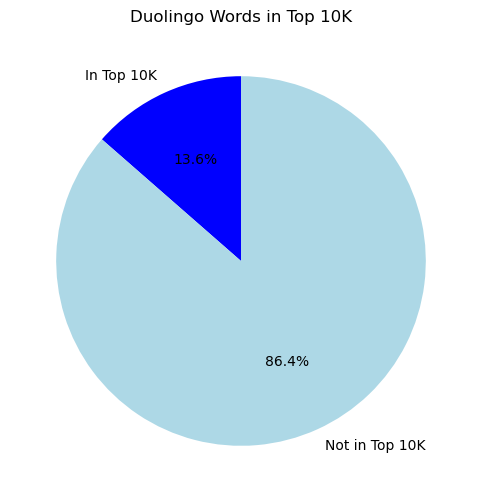

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Words in and not in the Top 10K for Duolingo
duolingo_in_top10k = combined["Duolingo_Words"] == 1
duolingo_not_in_top10k = combined["Duolingo_Words"] == 0

# Counts
duolingo_in_count = duolingo_in_top10k.sum()
duolingo_not_in_count = duolingo_not_in_top10k.sum()

# Pie chart
plt.figure(figsize=(6, 6))
labels = ["In Top 10K", "Not in Top 10K"]
sizes = [duolingo_in_count, duolingo_not_in_count]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["blue", "lightblue"])
plt.title("Duolingo Words in Top 10K")
plt.show()


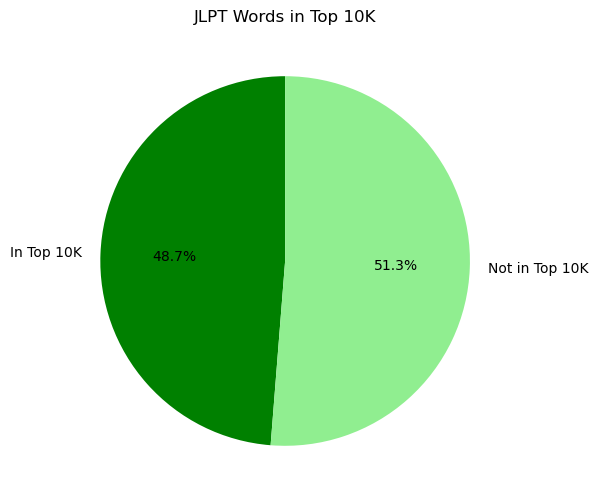

In [7]:
# Words in and not in the Top 10K for JLPT
jlpt_in_top10k = combined["JLPT_Words"] == 1
jlpt_not_in_top10k = combined["JLPT_Words"] == 0

# Counts
jlpt_in_count = jlpt_in_top10k.sum()
jlpt_not_in_count = jlpt_not_in_top10k.sum()

# Pie chart
plt.figure(figsize=(6, 6))
sizes = [jlpt_in_count, jlpt_not_in_count]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["green", "lightgreen"])
plt.title("JLPT Words in Top 10K")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


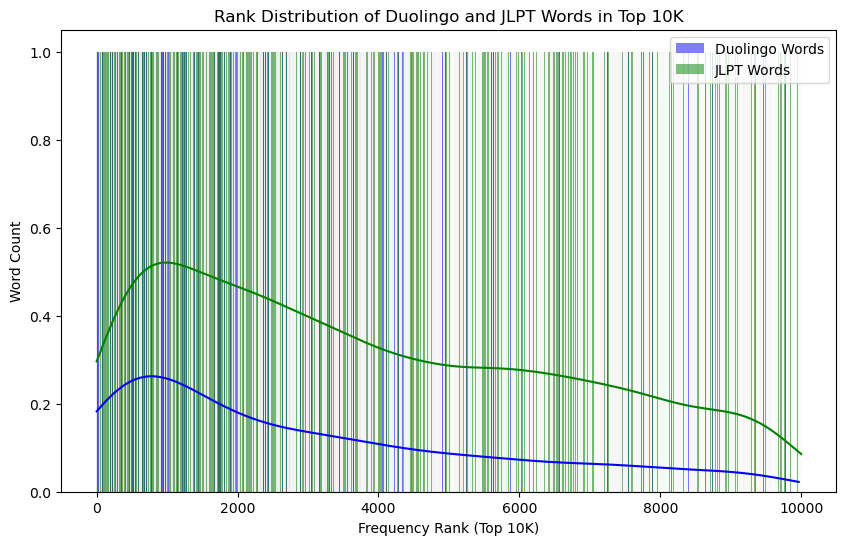

In [8]:
plt.figure(figsize=(10, 6))

# Histogram for Duolingo words
sns.histplot(
    data=combined[duolingo_in_top10k],
    x="Rank",
    bins=50,
    color="blue",
    label="Duolingo Words",
    kde=True
)

# Histogram for JLPT words
sns.histplot(
    data=combined[jlpt_in_top10k],
    x="Rank",
    bins=50,
    color="green",
    label="JLPT Words",
    kde=True
)

plt.xlabel("Frequency Rank (Top 10K)")
plt.ylabel("Word Count")
plt.title("Rank Distribution of Duolingo and JLPT Words in Top 10K")
plt.legend()
plt.show()


In [9]:
print(f"Duolingo Words in Top 10K: {duolingo_in_count}")
print(f"Duolingo Words not in Top 10K: {duolingo_not_in_count}")
print(f"JLPT Words in Top 10K: {jlpt_in_count}")
print(f"JLPT Words not in Top 10K: {jlpt_not_in_count}")


Duolingo Words in Top 10K: 1957
Duolingo Words not in Top 10K: 12470
JLPT Words in Top 10K: 7033
JLPT Words not in Top 10K: 7394


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

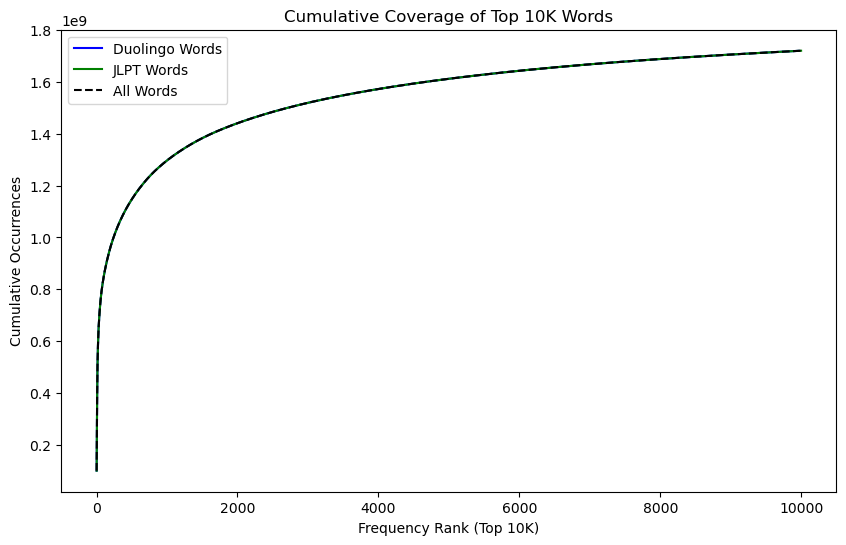

In [10]:
plt.figure(figsize=(10, 6))

# Calculate cumulative frequency for all words
combined["Cumulative_Occurrences"] = combined["Occurrences"].cumsum()

# Plot cumulative occurrence for Duolingo and JLPT
sns.lineplot(
    data=combined[combined["Duolingo_Words"] == 1],
    x="Rank",
    y="Cumulative_Occurrences",
    label="Duolingo Words",
    color="blue"
)

sns.lineplot(
    data=combined[combined["JLPT_Words"] == 1],
    x="Rank",
    y="Cumulative_Occurrences",
    label="JLPT Words",
    color="green"
)

# Add overall cumulative line for reference
sns.lineplot(
    data=combined,
    x="Rank",
    y="Cumulative_Occurrences",
    label="All Words",
    color="black",
    linestyle="--"
)

plt.xlabel("Frequency Rank (Top 10K)")
plt.ylabel("Cumulative Occurrences")
plt.title("Cumulative Coverage of Top 10K Words")
plt.legend()
plt.show()


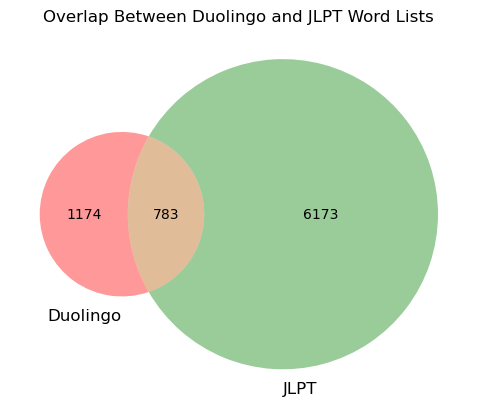

In [11]:
from matplotlib_venn import venn2

# Calculate overlap
duolingo_words = set(combined[combined["Duolingo_Words"] == 1]["Word"])
jlpt_words = set(combined[combined["JLPT_Words"] == 1]["Word"])

venn = venn2([duolingo_words, jlpt_words], ("Duolingo", "JLPT"))
plt.title("Overlap Between Duolingo and JLPT Word Lists")
plt.show()


In [13]:
print(duolingo_words)

{'さつ', 'オムライス', '列島', 'はち', '無', 'ところ', '男', '黒板', 'すみ', '借りる', '貝', 'スキル', '雨', 'ジャケット', 'すこし', 'セーター', '猫', 'せまい', 'つり', 'みせ', 'ロビー', 'かぞく', '旗', 'か', '議会', '昔', 'ぬいぐるみ', 'フィリピン', 'ショート', 'はなび', '銃', '気候', 'ミニ', 'サーフィン', 'どうふ', 'ショー', 'マグネット', '仲', '波', '製', 'ご飯', '引き出し', '豚肉', '霧', 'ナプキン', '八千', '便利', '得', '含', '敗', '魔法', '発明', 'かい', '上司', '鉱物', 'たんじょう', '始まり', 'こん', '場', 'ケーキ', 'オーストラリア', '見', 'せんたく', '章', '組織', 'くろい', '新聞', 'かだい', '教育', '野菜', '小説', 'フルート', '席', 'はな', 'オーブン', '腹', 'けいたい', '湖', 'キー', '次', '尊敬', 'いいえ', 'じゃあ', '幼稚', '税', '値引き', 'コースター', 'コーチ', '息', '花粉', '網', '宝', '癖', 'きょうしつ', '尊重', 'レタス', '体', 'イルミネーション', '拍手', 'まだ', 'ちゃいろ', '建築', 'コーラ', '白', '券', 'べ', 'ながい', 'プラスチック', '何', 'エレベーター', 'まあまあ', 'ポスター', 'デート', '親', 'り', '布団', 'エンジン', 'わるい', '酢', '少年', 'トイレ', '系', '血', 'ガーデニング', 'まつ', '瓶', 'しょうゆ', '授業', '木', '歯痛', 'ウェイター', '日曜', '液体', '油', 'て', '牛乳', '運', 'ノンフィクション', 'キス', '保険', 'やっ', 'おおさか', '春', 'やる気', 'てつ', '自信', 'りんご', 'いがい', 'こうえん', '待つ', 'カタカナ', '更衣', '質', '人々', '今

In [14]:
print(jlpt_full)

     Word JLPT_Level
0      毎月         N5
1      太い         N5
2      五日         N5
3      出る         N5
4       話         N5
...   ...        ...
7394   作り         N1
7395   調理         N1
7396  聴診器         N1
7397  誂える         N1
7398  即する         N1

[7399 rows x 2 columns]


In [15]:
print(Top10K_Kagome)

     Lemma  Occurrences
0        の    100210912
1        に     48486620
2        を     45359475
3        は     44889871
4        年     36248501
...    ...          ...
9995    不振        13753
9996    配線        13752
9997  意味合い        13752
9998    必然        13750
9999   カッコ        13749

[10000 rows x 2 columns]


In [16]:
print(combined)

       Rank Word Occurrences  Duolingo_Words  JLPT_Words JLPT_Level  \
0         1    の   100210912               1           1         N5   
1         2    に    48486620               1           1         N5   
2         3    を    45359475               1           1         N5   
3         4    は    44889871               1           1         N5   
4         5    年    36248501               1           1         N5   
...     ...  ...         ...             ...         ...        ...   
14422  None  兼ねて        None               0           1         N1   
14423  None  沈める        None               0           1         N1   
14424  None  聴診器        None               0           1         N1   
14425  None  誂える        None               0           1         N1   
14426  None  即する        None               0           1         N1   

      Cumulative_Occurrences  
0                  100210912  
1                  148697532  
2                  194057007  
3                  2389

In [18]:
Scraped = pd.read_csv("Output/Scraped_Wordlist.csv", encoding = "utf-8")
print(Scraped)

       Rank Word  Occurrences  Duolingo_Words  JLPT_Words JLPT_Level  \
0       1.0    の  100210912.0               1           1         N5   
1       2.0    に   48486620.0               1           1         N5   
2       3.0    を   45359475.0               1           1         N5   
3       4.0    は   44889871.0               1           1         N5   
4       5.0    年   36248501.0               1           1         N5   
...     ...  ...          ...             ...         ...        ...   
14422   NaN  兼ねて          NaN               0           1         N1   
14423   NaN  沈める          NaN               0           1         N1   
14424   NaN  聴診器          NaN               0           1         N1   
14425   NaN  誂える          NaN               0           1         N1   
14426   NaN  即する          NaN               0           1         N1   

                                             Definitions  JLPT_Levels  
0                               ['indicates possessive']       